# Регрессия 
Предсказываем, скольок часов работник будет отсутстсовать на работе. Датасет был взят: https://www.kaggle.com/loganalive/absenteeism-at-work-an-uci-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Absenteeism_at_work.csv")

In [4]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Удалим дубликаты

In [9]:
data = data[~data.duplicated()]
data.shape

(706, 21)

Посмотрим на расспределения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C79D808>,
      dtype=object)

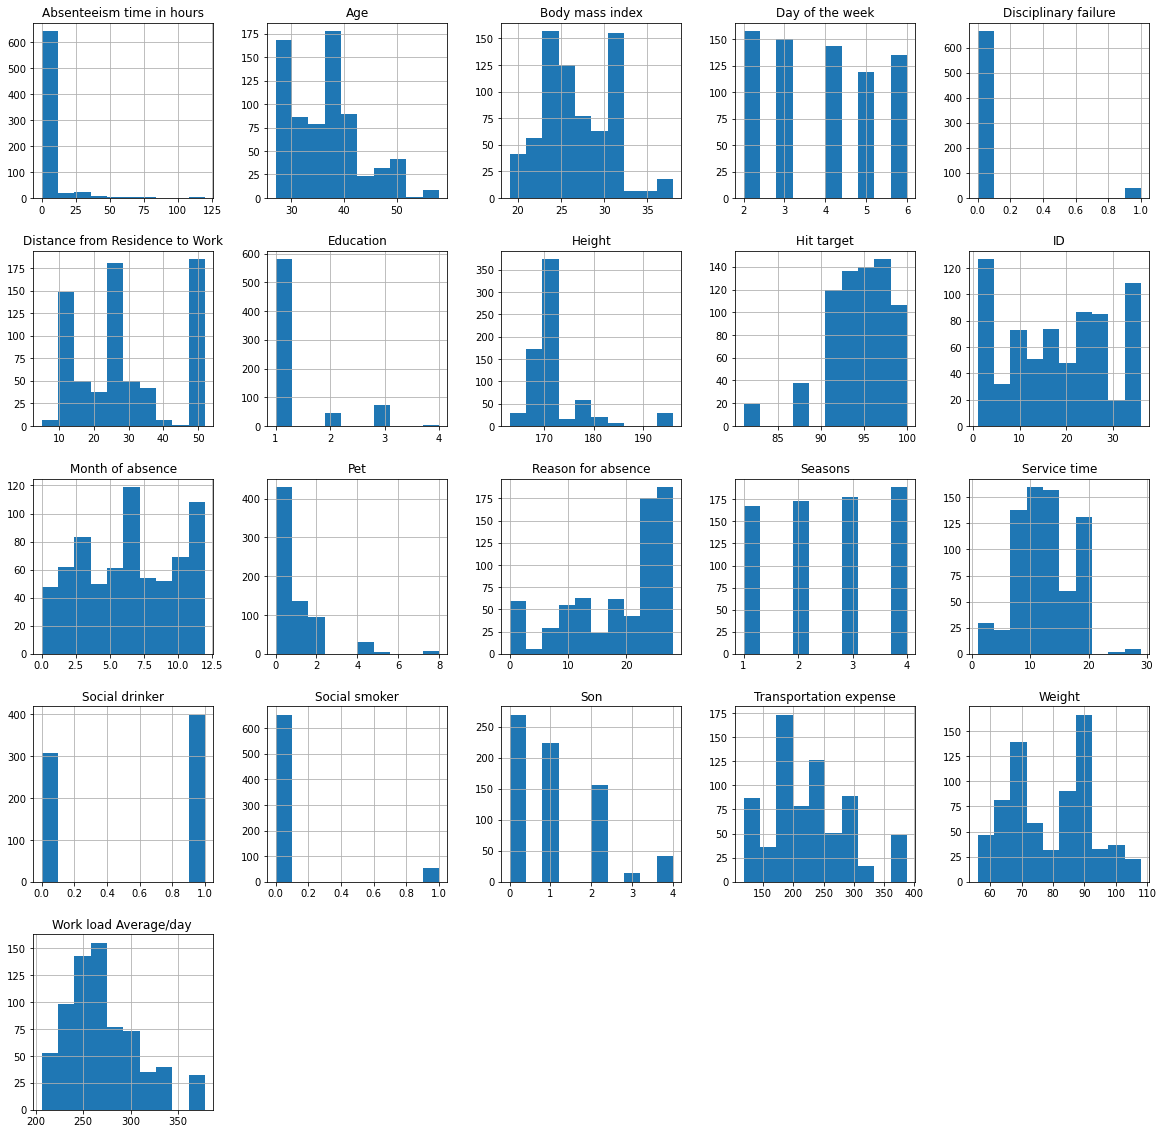

In [8]:
data.hist(figsize=(20, 20))

Удалим ненужный столбец

In [10]:
data.drop(['ID'], axis=1, inplace=True) 

### Разделим столбцы по категориям 

In [11]:
data.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [12]:
target = ['Absenteeism time in hours']

numerical = [
    'Age', 
    'Body mass index', 'Distance from Residence to Work',
    'Height', 'Hit target', 'Service time', 'Transportation expense',
    'Weight', 'Work load Average/day '
]

categorical = [col for col in data.columns if col not in numerical+target]

### Посмотрим на зависимость непрерывных переменных

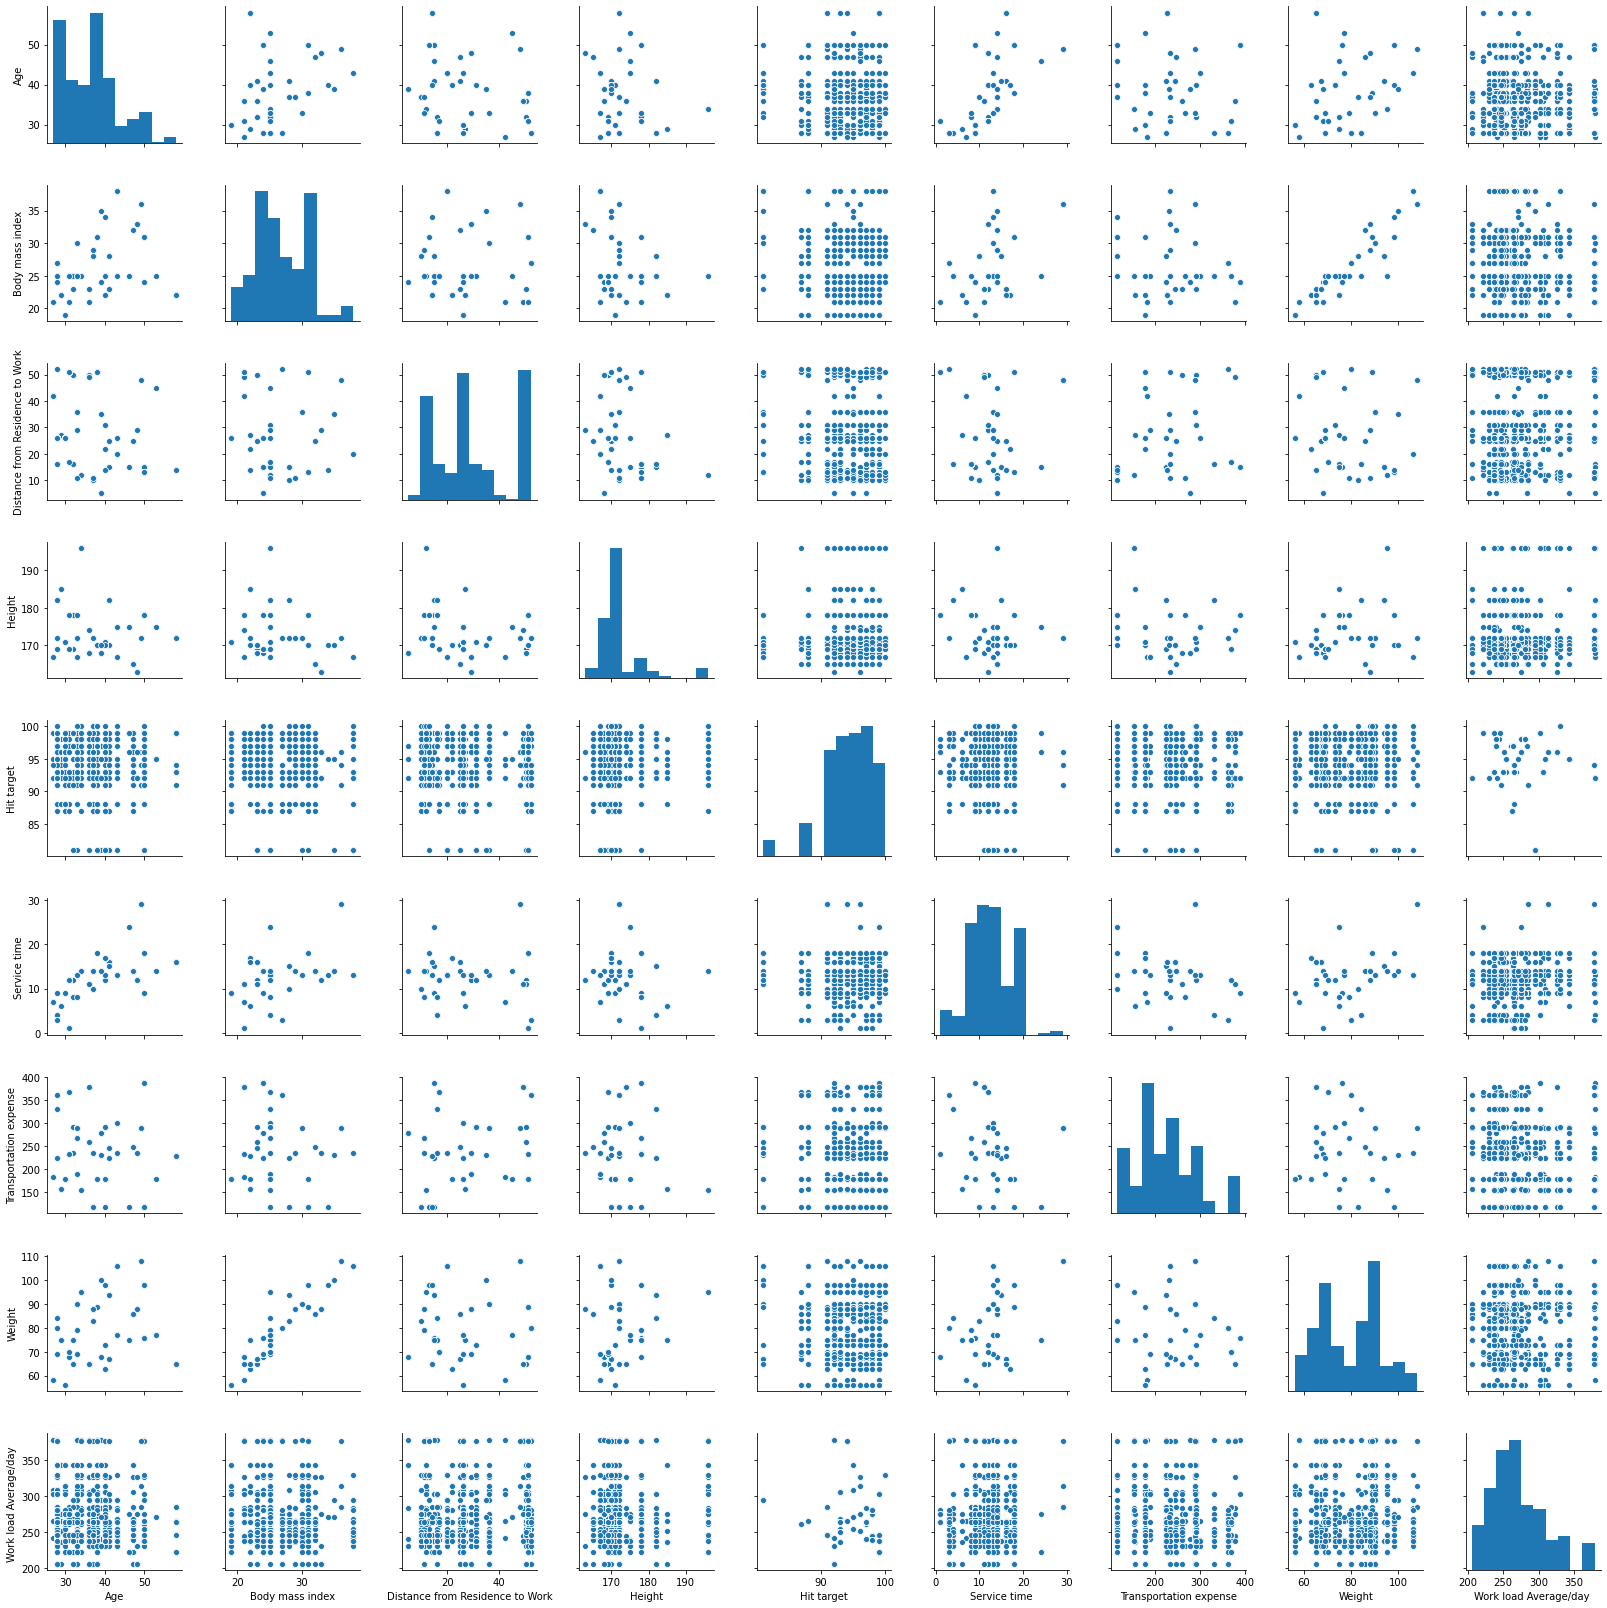

In [13]:
sns.pairplot(data[numerical])

#### Посмотрим на распределение целевой переменной

In [14]:
sorted(data['Absenteeism time in hours'].unique())

[0, 1, 2, 3, 4, 5, 7, 8, 16, 24, 32, 40, 48, 56, 64, 80, 104, 112, 120]

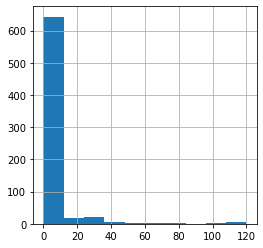

In [16]:
plt.figure(figsize=(4, 4))
data['Absenteeism time in hours'].hist()

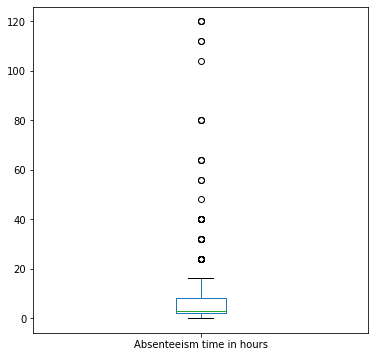

In [17]:
plt.figure(figsize=(6, 6))
data['Absenteeism time in hours'].plot.box()

Применим логарифмироввание шкалы

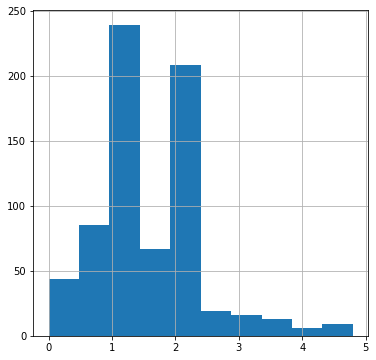

In [19]:
plt.figure(figsize=(6, 6))
(data['Absenteeism time in hours']+1).apply(np.log).hist()

Как видим на графиках, присутсвует большое число выбросов

#### Уберем выбросы целевой переменной

In [20]:
data = data[data['Absenteeism time in hours'] <= 60]

In [21]:
data['Absenteeism time in hours'] = (data['Absenteeism time in hours']+1).apply(np.log)

In [22]:
data.shape

(694, 20)

### Категориальные переменные

In [23]:
data[categorical].head()

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,26,7,3,1,0,1,2,1,0,1
1,0,7,3,1,1,1,1,1,0,0
2,23,7,4,1,0,1,0,1,0,0
3,7,7,5,1,0,1,2,1,1,0
4,23,7,5,1,0,1,2,1,0,1


Посмотрим на распределение значений стобца Reason for absence

In [36]:
plt.style.use("ggplot")

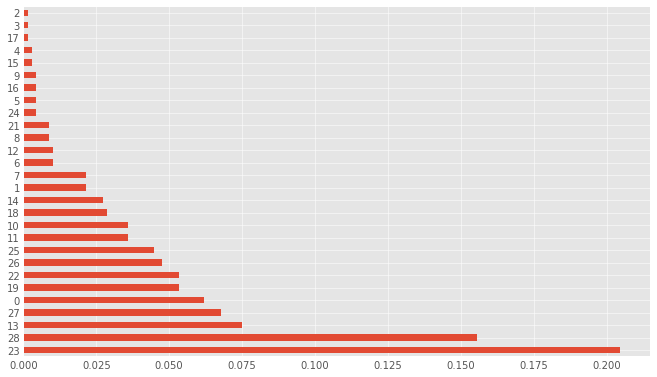

In [37]:
data['Reason for absence'].value_counts(normalize=True).plot.barh(figsize=(10, 6))

In [39]:
data['Reason for absence'].value_counts(normalize=True)[:5].sum()

0.5648414985590777

Первые 5 значений отсортированные по доли от общего количества составляют 56%

### Кодирование категориальных переменных

In [41]:
data['Reason for absence'].value_counts(normalize=True)[:5]

23    0.204611
28    0.155620
13    0.074928
27    0.067723
0     0.061960
Name: Reason for absence, dtype: float64

In [42]:
stay = [0, 27, 13, 28, 23]

In [43]:
data['Reason for absence'] = data['Reason for absence'].apply(
    lambda x: x if x in stay else -1
)

44% значение закодировали как -1, это моможет нам в дальнейшем не раздувать количество атрибутов, при использовании  get_dumies

In [46]:
data['Reason for absence'].unique()

array([-1,  0, 23, 13, 28, 27], dtype=int64)

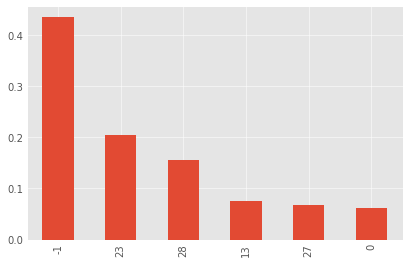

In [47]:
data['Reason for absence'].value_counts(normalize=True).plot.bar()

In [48]:
len(data['Month of absence'].unique())

13

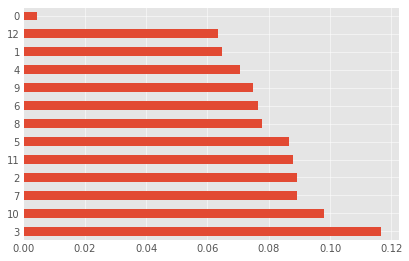

In [49]:
data['Month of absence'].value_counts(normalize=True).plot.barh()

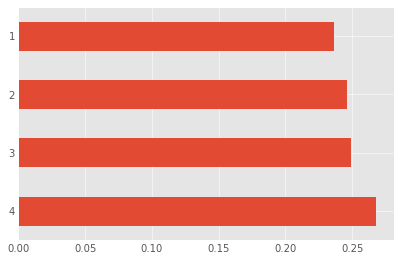

In [50]:
data['Seasons'].value_counts(normalize=True).plot.barh()

Для того чтобы не увеличиваить кол-во атрибутов, удалим стобец Month of absence т.к. эта информация содержится в 'Seasons'

In [51]:
data.drop(['Month of absence'], axis=1, inplace=True)

In [55]:
categorical2 = categorical.remove('Month of absence')

In [60]:
data[categorical].head()

,Reason for absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,-1,3,1,0,1,2,1,0,1
1,0,3,1,1,1,1,1,0,0
2,23,4,1,0,1,0,1,0,0
3,-1,5,1,0,1,2,1,1,0
4,23,5,1,0,1,2,1,0,1


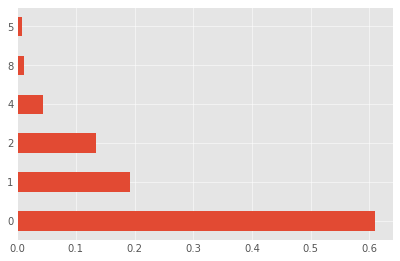

In [61]:
data['Pet'].value_counts(normalize=True).plot.barh()

Уменьшим кол-во уникальных значений

In [62]:
data['Pet'] = data['Pet'].apply(lambda x: x if x in [0, 1] else "more")

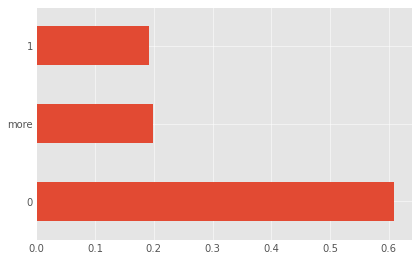

In [63]:
data['Pet'].value_counts(normalize=True).plot.barh()

In [64]:
data[categorical].head()

,Reason for absence,Day of the week,Seasons,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet
0,-1,3,1,0,1,2,1,0,1
1,0,3,1,1,1,1,1,0,0
2,23,4,1,0,1,0,1,0,0
3,-1,5,1,0,1,2,1,1,0
4,23,5,1,0,1,2,1,0,1


### Применим get_dummies для трансформации категориальных переменных

In [71]:
data = pd.get_dummies(data, columns=categorical, drop_first=True)

In [72]:
data.shape

(694, 34)

In [73]:
data.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Body mass index,Absenteeism time in hours,...,Education_3,Education_4,Son_1,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_more
0,289,36,13,33,239.554,97,90,172,30,1.609438,...,0,0,0,1,0,0,1,0,1,0
1,118,13,18,50,239.554,97,98,178,31,0.000000,...,0,0,1,0,0,0,1,0,0,0
2,179,51,18,38,239.554,97,89,170,31,1.098612,...,0,0,0,0,0,0,1,0,0,0
3,279,5,14,39,239.554,97,68,168,24,1.609438,...,0,0,0,1,0,0,1,1,0,0
4,289,36,13,33,239.554,97,90,172,30,1.098612,...,0,0,0,1,0,0,1,0,1,0


## Работаем с непрерывными переменными

Удалим наблюдения которые в стобце 'Reason for absence'.

In [74]:
data = data[data['Reason for absence_0']!=1]

In [75]:
data.shape

(651, 34)

### Сделаем трейн тест сплит

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Absenteeism time in hours'], axis=1), 
    data['Absenteeism time in hours'],
    test_size=0.3
)

### Выполним нормализацию данных

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[numerical])
X_test_scaled_numeric = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled_numeric
X_test[numerical] = X_test_scaled_numeric

#### Напишем функцию для выода точно оценки алгоритма

In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [82]:
from sklearn import metrics

def dataframe_metrics(y_test,y_pred):
    stats = [
       metrics.mean_absolute_error(np.exp(y_test)-1, np.exp(y_pred)-1),
       np.sqrt(metrics.mean_squared_error(np.exp(y_test)-1, np.exp(y_pred)-1)),
       metrics.r2_score(np.exp(y_test), np.exp(y_pred)-1),
       mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
    ]
    return stats
measured_metrics = pd.DataFrame({"error_type":["MAE", "RMSE", "R2", "MAPE"]})
measured_metrics.set_index("error_type")

""
error_type
MAE
RMSE
R2
MAPE


### Определим baseline

In [83]:
y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([1.64408569, 1.64408569, 1.64408569, 1.64408569, 1.64408569])

посмотрим на точность

In [84]:
measured_metrics["naive"] = dataframe_metrics(y_test, y_pred_naive)
measured_metrics

,error_type,naive
0,MAE,4.353511
1,RMSE,7.966819
2,R2,-0.184994
3,MAPE,60.756939


## Используем классическую линейную регрессию

In [85]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

measured_metrics["simple_linreg"] = dataframe_metrics(y_test, y_pred_regr)
measured_metrics

,error_type,naive,simple_linreg
0,MAE,4.353511,3.576020
1,RMSE,7.966819,7.228246
2,R2,-0.184994,0.034328
3,MAPE,60.756939,49.573261


Посмотрим на важность признаков

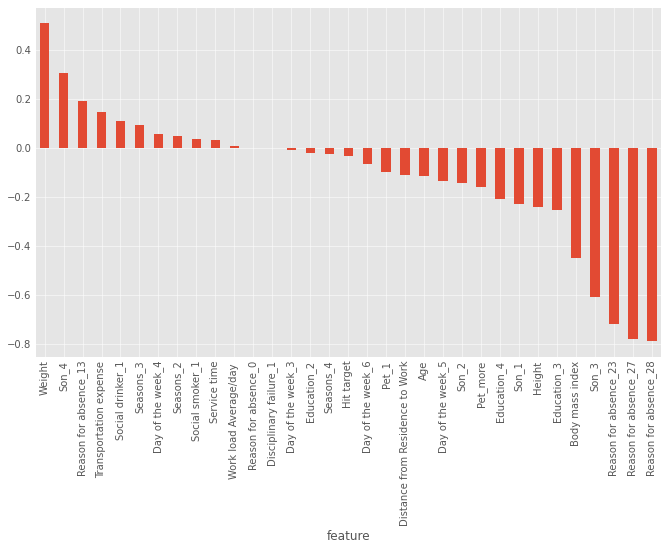

In [86]:
featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6))

## Используем Lasso регрессию

Лучшее значение параметра: 0.0030454955172339033


,error_type,naive,simple_linreg,lasso_cv
0,MAE,4.353511,3.576020,3.428428
1,RMSE,7.966819,7.228246,7.177209
2,R2,-0.184994,0.034328,0.043048
3,MAPE,60.756939,49.573261,47.024476


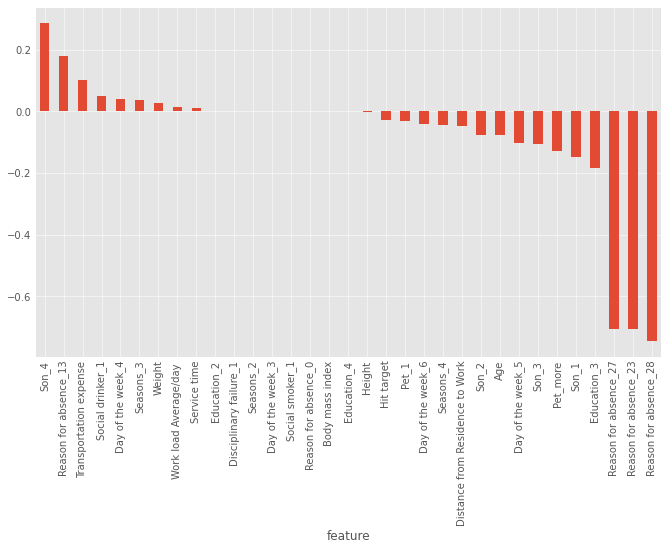

In [87]:
from sklearn.linear_model import LassoCV

# Объявили модель
lasso_cv = LassoCV(cv=5)

# Обучили модель на тренировочной выборке 
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)
# Сделали прогнозы на тестовой выборке 
y_pred_lasso = lasso_cv.predict(X_test)


featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));


measured_metrics["lasso_cv"] = dataframe_metrics(y_test, y_pred_lasso)
measured_metrics

## Используем  ElasticNet регрессию

,error_type,naive,simple_linreg,lasso_cv,elastic_cv
0,MAE,4.353511,3.576020,3.428428,3.433035
1,RMSE,7.966819,7.228246,7.177209,7.187858
2,R2,-0.184994,0.034328,0.043048,0.040167
3,MAPE,60.756939,49.573261,47.024476,47.017617


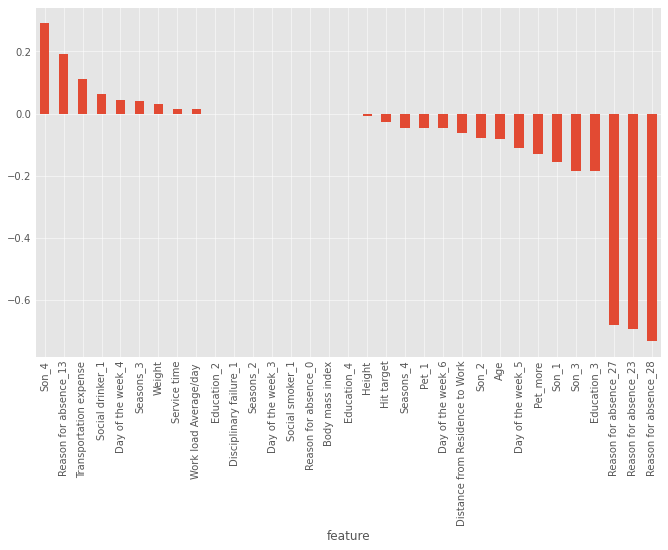

In [88]:
from sklearn.linear_model import ElasticNetCV

# Объявили модель
elastic_cv = ElasticNetCV(cv=5)

# Обучили модель на тренировочной выборке 
elastic_cv.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_elastic = elastic_cv.predict(X_test)


featureImportance = pd.DataFrame({"feature": data.drop(target,axis=1).columns, 
                                  "importance": elastic_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(10, 6));


measured_metrics["elastic_cv"] = dataframe_metrics(y_test, y_pred_elastic)
measured_metrics

В результате наиболее точна модель на основе Lasso регрессии.